<a href="https://colab.research.google.com/github/thobiasgd/portfolio/blob/main/analise_airbnb_roma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="100%" src="https://raw.githubusercontent.com/thobiasgd/portfolio/main/banner.png">


*by [Thobias Gonçalves Dordete](https://www.linkedin.com/in/thobias-gon%25C3%25A7alves-dordete-33b19720a)*

---

# Análise dos Dados do Airbnb - *Roma*

O [Airbnb](https://www.airbnb.com.br/) é uma plataforma de aluguéis de imóveis a curto prazo cuja origem remonta em 2008, e que apresentou um **aumento de 800 mil** opções em seu catálogo nos últimos 4 anos, se tornando a maior empresa de hotelaria do mundo.

A premissa da empresa é facilitar a conexão entre locadores e locatário, trazendo facilidade para anfitriões que possuem residências e quartos ociosos, e turistas que preferem um preço reduzido e/ou maior autonomia em suas viagens.

O objetivo desta análise é explorar os dados fornecidos gratuitamente pela própria empresa em seu portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), descrever possíveis problemas obtidos a partir de informações, e por fim, gerar insights potencialmente valiosos e úteis para a **resolução de problemas**.


&nbsp;

<center><img alt="Analisando Airbnb" width="35%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

&nbsp;

**Neste *notebook*, iremos analisar os dados referentes à cidade Roma, e analisar quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados obtidos por esta análise foram retirados diretamente do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

É importante ressaltar que a empresa disponibiliza diferentes versões do dataset que por sua vez são atualizadas constantemente.

Para este projeto foi utilizado o arquivo `listings.csv` que oferece informações resumidas de cada item do catálogo da empresa na cidade de Roma.

Para a manusear e visualizar o conjunto de dados foram utilizadas as bibliotecas *pandas*, *matplotlib* e *seaborn*, ferramentas comumente utilziadas no meio da ciência de dados.


In [1]:
# importando os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
# importando o arquivo listings.csv para um DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/thobiasgd/datasets/main/airbnb_italy.csv')

## Análise dos Dados

A fim de contextualizar o leitor para melhor compreensão dos dados é necessário descrever cada atributo (*feature*) do conjunto de dados (*dataframe*).

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o item do catálogo
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - quantidade de reviews nos últimos 12 meses
* `license` - tipo da licença

Antes de começar qualquer tipo de análise, é importante verificar os primeiros 5 itens do *dataset* para fins de contextualização do conjunto.


In [3]:
# mostrando as 5 primeiras entradas
df.head()

id                                               name  host_id  \
0  75474   Villa in Rome · 9 bedrooms · 10 beds · 6.5 baths   400717   
1   2737  Place to stay in Rome · ★4.80 · 1 bedroom · 1 ...     3047   
2   3079  Rental unit in Rome · ★4.53 · 1 bedroom · 1 be...     3504   
3  77831  Rental unit in Rome · ★4.84 · 1 bedroom · 3 be...   417964   
4  11834  Rental unit in Rome · ★4.83 · 1 bedroom · 1 be...    44552   

  host_name  neighbourhood_group      neighbourhood   latitude  longitude  \
0    Marina                  NaN    III Monte Sacro  41.989590  12.521540   
1      Elif                  NaN  VIII Appia Antica  41.871360  12.482150   
2     Laura                  NaN   I Centro Storico  41.895000  12.491170   
3  Nathalie                  NaN   I Centro Storico  41.897330  12.491700   
4    Serena                  NaN   I Centro Storico  41.895447  12.491181   

         room_type   price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt  1973.0               3                  2  2023-06-20   
1     Private room    50.0               7                  5  2015-05-08   
2  Entire home/apt   120.0              30                 21  2022-04-30   
3  Entire home/apt   129.0               3                310  2023-11-27   
4  Entire home/apt   107.0               2                220  2023-11-12   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.31                               1               332   
1               0.05                               6               345   
2               0.13                               6               289   
3               2.00                               1               127   
4               1.43                               1               315   

   number_of_reviews_ltm                                            license  
0                      2                                                NaN  
1                      0                                                NaN  
2                      0                                                NaN  
3                     26  Vi comunico il CIU di Bonheur Monti Roma CVN-0...  
4                     48                                                NaN

### **Verificando se a quantidade de valores `id` é igual ao número de entradas:**

In [4]:
len(df['id'].unique()) == df.shape[0]

True

Como o número de entradas e o número de id são iguais, facilmente conclui-se que o `id` é único para cada item. Por conta disso, decidiu-se tornar o `id` como index do dataframe.

In [5]:
df.set_index('id', inplace = True)
df.head()

name  host_id host_name  \
id                                                                            
75474   Villa in Rome · 9 bedrooms · 10 beds · 6.5 baths   400717    Marina   
2737   Place to stay in Rome · ★4.80 · 1 bedroom · 1 ...     3047      Elif   
3079   Rental unit in Rome · ★4.53 · 1 bedroom · 1 be...     3504     Laura   
77831  Rental unit in Rome · ★4.84 · 1 bedroom · 3 be...   417964  Nathalie   
11834  Rental unit in Rome · ★4.83 · 1 bedroom · 1 be...    44552    Serena   

       neighbourhood_group      neighbourhood   latitude  longitude  \
id                                                                    
75474                  NaN    III Monte Sacro  41.989590  12.521540   
2737                   NaN  VIII Appia Antica  41.871360  12.482150   
3079                   NaN   I Centro Storico  41.895000  12.491170   
77831                  NaN   I Centro Storico  41.897330  12.491700   
11834                  NaN   I Centro Storico  41.895447  12.491181   

             room_type   price  minimum_nights  number_of_reviews last_review  \
id                                                                              
75474  Entire home/apt  1973.0               3                  2  2023-06-20   
2737      Private room    50.0               7                  5  2015-05-08   
3079   Entire home/apt   120.0              30                 21  2022-04-30   
77831  Entire home/apt   129.0               3                310  2023-11-27   
11834  Entire home/apt   107.0               2                220  2023-11-12   

       reviews_per_month  calculated_host_listings_count  availability_365  \
id                                                                           
75474               0.31                               1               332   
2737                0.05                               6               345   
3079                0.13                               6               289   
77831               2.00                               1               127   
11834               1.43                               1               315   

       number_of_reviews_ltm  \
id                             
75474                      2   
2737                       0   
3079                       0   
77831                     26   
11834                     48   

                                                 license  
id                                                        
75474                                                NaN  
2737                                                 NaN  
3079                                                 NaN  
77831  Vi comunico il CIU di Bonheur Monti Roma CVN-0...  
11834                                                NaN

### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [6]:
# indentificando o volume de dados do DataFrame
print(f'Número de entradas: {df.shape[0]}')
print(f'Número de atributos: {df.shape[1]}', "\n")

# identificando os tipos das variáveis
df.dtypes

Número de entradas: 29357
Número de atributos: 17 



name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Investigando o tipo de variável de cada atributo, pode-se concluir que:

* O *pandas* interpretou a coluna `neighbourhood_group` como *float64* apesar de este não conter nenhuma entrada tipo *float* em si. Isso se deve ao fato de que o *pandas* interpreta uma coluna que tenha *Not a Number* (NaN) como *float64* por padrão.
* O atributo `last_review` foi importado como *object* apesar de claramente representar uma data. Será necessário transformá-la para um tipo *datetime* futuramente.

### **Qual a porcentagem de valores ausentes no *dataset*?**

In [7]:
# ordenando em ordem decrescente as variáveis por seus valores ausentes
df.isnull().sum().sort_values(ascending = False)

neighbourhood_group               29357
license                           22564
last_review                        4271
reviews_per_month                  4271
price                              1976
host_name                             9
latitude                              0
longitude                             0
room_type                             0
host_id                               0
minimum_nights                        0
number_of_reviews                     0
neighbourhood                         0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
name                                  0
dtype: int64

In [8]:
print('Valores ausentes no dataset (%)', '\n')
((df[['neighbourhood_group', 'license', 'reviews_per_month', 'last_review', 'price', 'host_name']].isnull().sum().sort_values(ascending = False) / df.shape[0]) * 100).round(2)

Valores ausentes no dataset (%) 



neighbourhood_group    100.00
license                 76.86
reviews_per_month       14.55
last_review             14.55
price                    6.73
host_name                0.03
dtype: float64

Em relação aos valores ausentes é possível inferir que:

* Assim como dito anteriormente `neighbourhood_group` não representa nenhuma capacidade útil para a análise por ser nula em todas as entradas.

* A itália exige de certos anfitriões, que tenham licenças para prestar serviço de aluguel de imóvel. Cogita-se que a grande porcentagem de valores nulos na variável `license` diz respeito a não obrigatoriedade de se mostrar tais licenças para o público.

* É totalmente compreensível que a porcentagem das variáveis `reviews_per_month` e `last_review` sejam iguais, por se traterem das avaliações dos clientes.

* É incomum que os anunciantes deixem de inserir os dados de `price` e `host_name` em seus anúncios. Pode-se deduzir que estes anúncios foram criados a partir de acordos com condições especiais entre os contratantes.

A partir da primeira afirmação, decidiu-se excluir totalmente a variável  `neighbourhood_group`:

In [9]:
# excluindo coluna neighbourhood_group
df.drop(['neighbourhood_group'],axis=1, inplace = True)

In [10]:
# convertendo a coluna last_review para o formato datetime
df['last_review'] = pd.to_datetime(df['last_review'], format = '%Y-%m-%d')
type(df['last_review'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

### **Qual o tipo de distribuição das variáveis?**

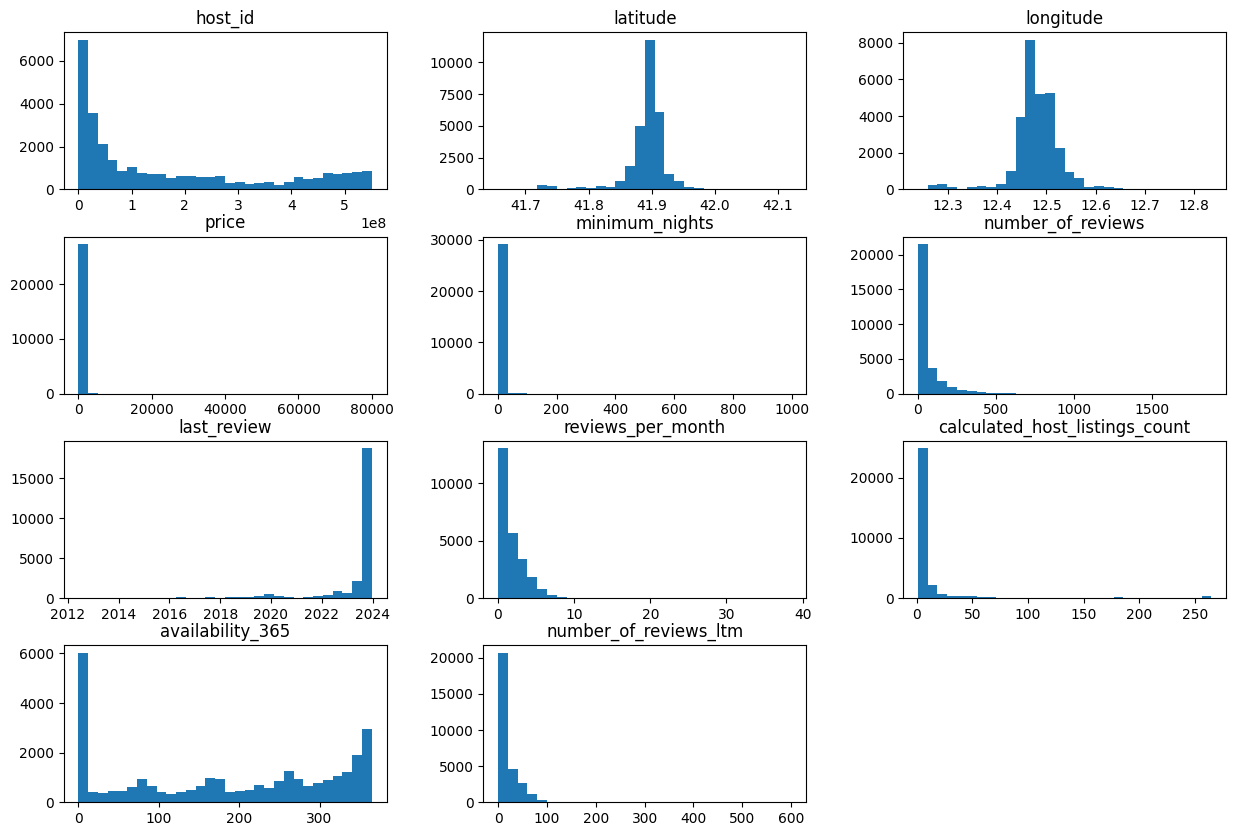

In [11]:
# plotando o histograma das variáveis numéricas
df.hist(figsize = (15, 10), bins = 30, grid = False);

#### **Removendo Outliers**

A partir dos histogramas acima pode-se observar que as variáveis `price`, `minimum_nights`, `calculated_host_listings_count` e `number_of_reviews` possuem *outliers* que não são úteis para a análise e dificultam o entendimento do conjunto em geral dos dados.

Decidiu-se gerar gráficos de *boxplot* para melhor compreensão destes outliers e como se distribuem.

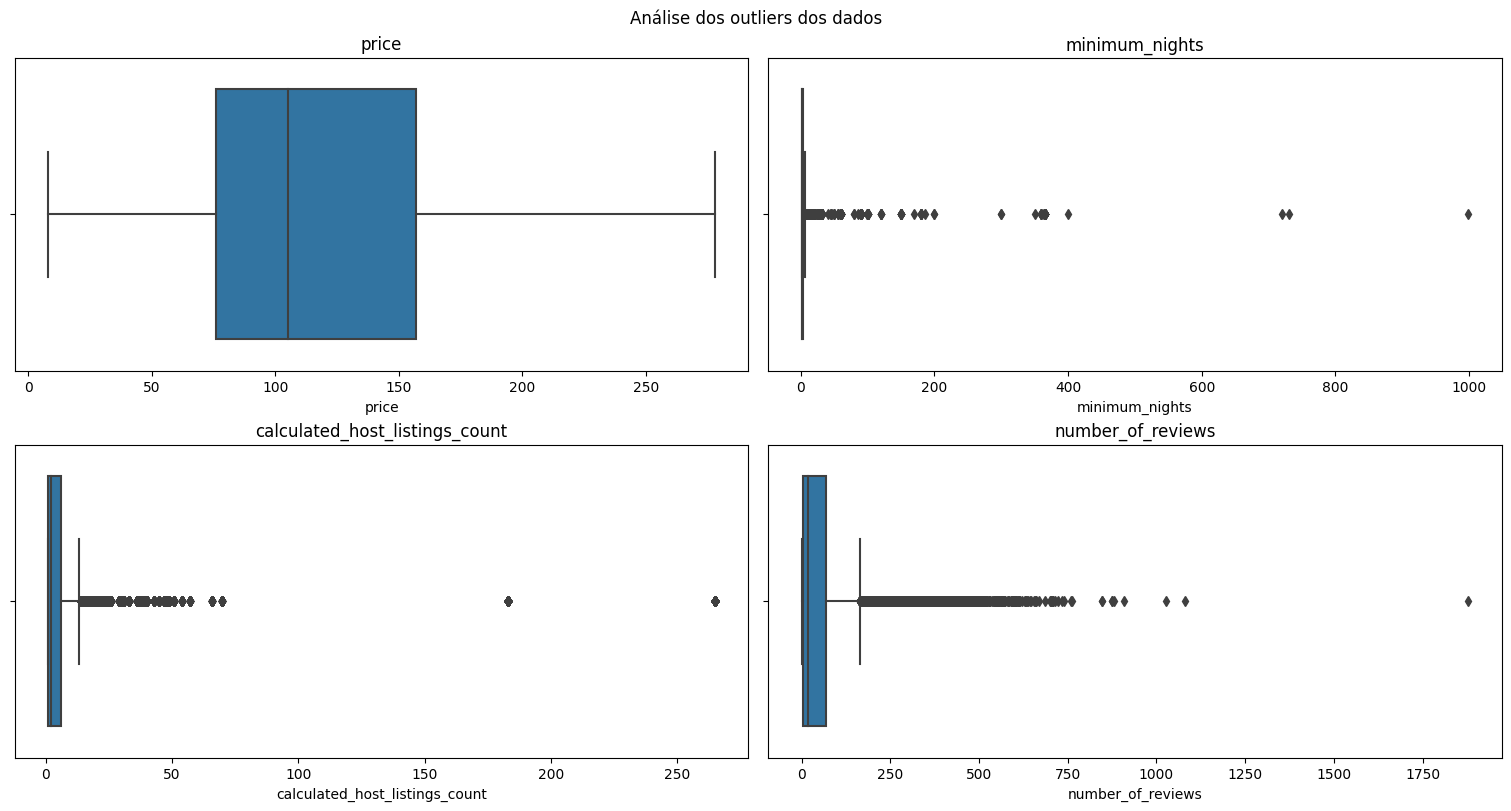

In [12]:
fig, ax = plt.subplots(figsize = (15,8), nrows = 2, ncols = 2, constrained_layout=True)

fig.suptitle('Análise dos outliers dos dados')
#fig.tight_layout()

ax[0][0] = sns.boxplot(x = 'price',data = df, ax = ax[0][0], showfliers=False)
ax[0][0].set_title('price')

ax[0][1] = sns.boxplot(x = 'minimum_nights',data = df, ax = ax[0][1])
ax[0][1].set_title('minimum_nights')

ax[1][0] = sns.boxplot(x = 'calculated_host_listings_count',data = df, ax = ax[1][0])
ax[1][0].set_title('calculated_host_listings_count')

ax[1][1] = sns.boxplot(x = 'number_of_reviews',data = df, ax = ax[1][1])
ax[1][1].set_title('number_of_reviews')

fig.show()

Agora que temos uma noção dos *outliers* destas variáveis, decidiu-se limpar os dados usando o método **Intervalo Entre Quartis** (IQR).

In [13]:
# IQR da variável price
q3_price = df['price'].quantile(.75)
q1_price = df['price'].quantile(.25)

IQR_price = q3_price - q1_price

limite_superior_price = q3_price + 1.5*IQR_price
limite_inferior_price = q1_price - 1.5*IQR_price

print('Limite superior de price: ', limite_superior_price)
print('Limite inferior de price: ', limite_inferior_price)

Limite superior de price:  278.5
Limite inferior de price:  -45.5


In [14]:
# IQR da variável minimum_nights
q3_minimum_nights = df['minimum_nights'].quantile(.75)
q1_minimum_nights = df['minimum_nights'].quantile(.25)

IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights

limite_superior_minimum_nights = q3_minimum_nights + 1.5*IQR_minimum_nights
limite_inferior_minimum_nights = q1_minimum_nights - 1.5*IQR_minimum_nights

print('Limite superior de minimum_nights: ', limite_superior_minimum_nights)
print('Limite inferior de minimum_nights: ', limite_inferior_minimum_nights)

Limite superior de minimum_nights:  6.0
Limite inferior de minimum_nights:  -2.0


In [15]:
# IQR da variável calculated_host_listings_count
q3_calculated_host_listings_count = df['calculated_host_listings_count'].quantile(.75)
q1_calculated_host_listings_count = df['calculated_host_listings_count'].quantile(.25)

IQR_calculated_host_listings_count = q3_calculated_host_listings_count - q1_calculated_host_listings_count

limite_superior_calculated_host_listings_count = q3_calculated_host_listings_count + 1.5*IQR_calculated_host_listings_count
limite_inferior_calculated_host_listings_count = q1_calculated_host_listings_count - 1.5*IQR_calculated_host_listings_count

print('Limite superior de calculated_host_listings_count: ', limite_superior_calculated_host_listings_count)
print('Limite inferior de calculated_host_listings_count: ', limite_inferior_calculated_host_listings_count)

Limite superior de calculated_host_listings_count:  13.5
Limite inferior de calculated_host_listings_count:  -6.5


In [16]:
# IQR da variável number_of_reviews
q3_number_of_reviews = df['number_of_reviews'].quantile(.75)
q1_number_of_reviews = df['number_of_reviews'].quantile(.25)

IQR_number_of_reviews = q3_number_of_reviews - q1_number_of_reviews

limite_superior_number_of_reviews = q3_number_of_reviews + 1.5*IQR_number_of_reviews
limite_inferior_number_of_reviews = q1_number_of_reviews - 1.5*IQR_number_of_reviews

print('Limite superior de number_of_reviews: ', limite_superior_number_of_reviews)
print('Limite inferior de number_of_reviews: ', limite_inferior_number_of_reviews)

Limite superior de number_of_reviews:  165.5
Limite inferior de number_of_reviews:  -94.5


Nota-se que nos quatro casos do limite inferior o resultado foi negativo, por conta disso será necessário futuramente igualar o limite inferior para zero, pois valores negativos nestas variáveis **não representam** a realidade corretamente.

Com os limites conhecidos, é possível realizar os cortes dos *outliers*. Primeiramente faz-se necessário criar uma cópia do *dataset* para realizar a limpeza a fim de garantir que não percamos nada do processo.

In [17]:
# criando uma cópia do dataset
df_clean = df.copy()

# limpando dataset
df_clean.drop(df_clean[df_clean['price'] > 278.5].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean['price'] == 0].index, axis = 0, inplace = True)

df_clean.drop(df_clean[df_clean['minimum_nights'] > 6].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean['minimum_nights'] == 0].index, axis = 0, inplace = True)

df_clean.drop(df_clean[df_clean['calculated_host_listings_count'] > 13.5].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean['calculated_host_listings_count'] == 0].index, axis = 0, inplace = True)

df_clean.drop(df_clean[df_clean['number_of_reviews'] > 165.5].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean['number_of_reviews'] == 0].index, axis = 0, inplace = True)

print(f'Entradas antes da limpeza = {df.shape[0]}')
print(f'Entradas depois da limpeza = {df_clean.shape[0]}', '\n')
print(f'Número de linhas excluidas = {df.shape[0] - df_clean.shape[0]}')
print(f'Representação em porcentagem = {round(((df.shape[0] - df_clean.shape[0])/df.shape[0])*100, 2)}%')


Entradas antes da limpeza = 29357
Entradas depois da limpeza = 17563 

Número de linhas excluidas = 11794
Representação em porcentagem = 40.17%


Com o novo conjunto de dados sem *outliers*, pode-se  gerar os novos *boxplots* e histogramas que fornecem uma boa noção da distribuição dos **dados mais comuns** do *dataset*.

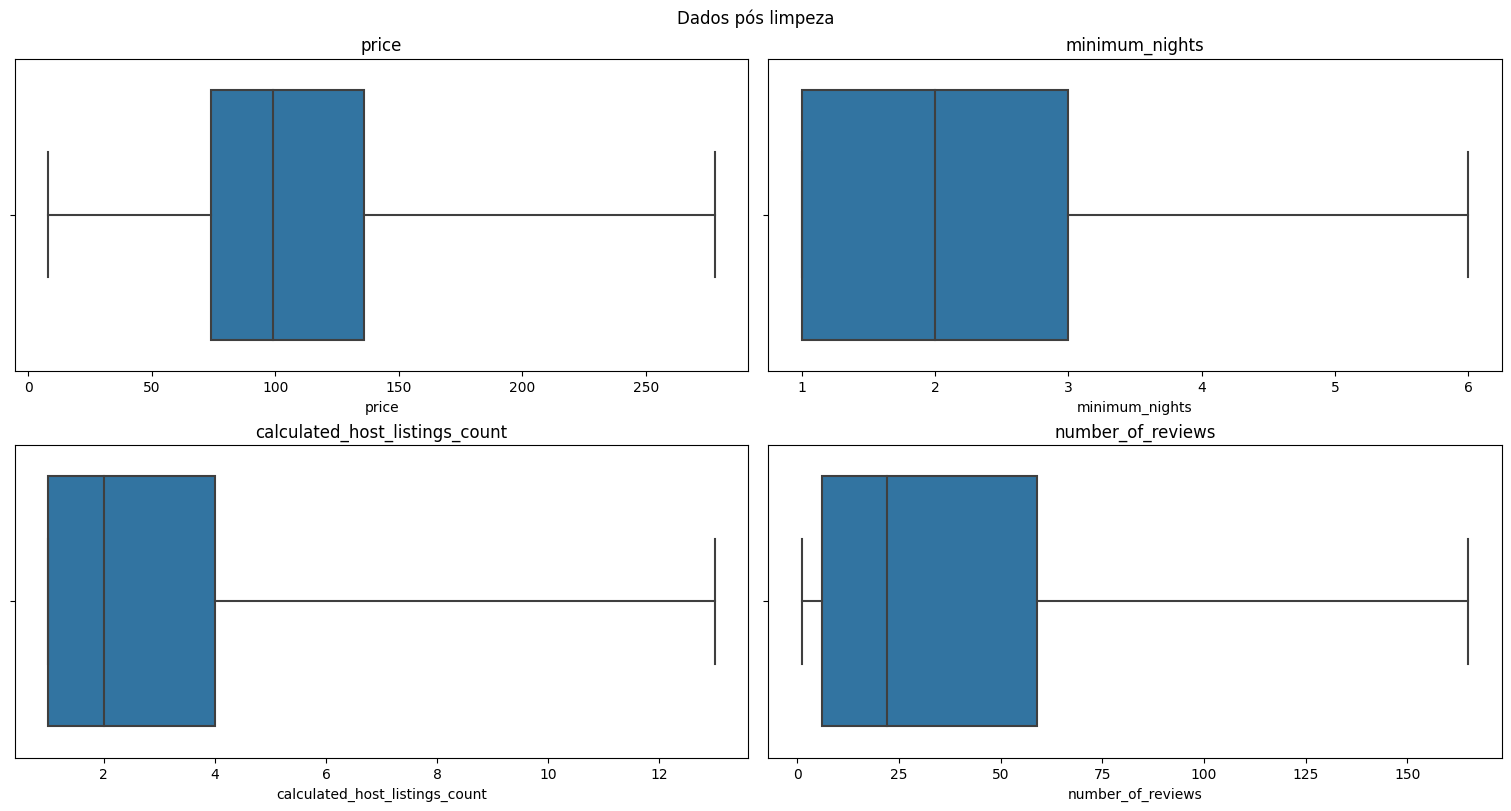

In [18]:
fig, ax = plt.subplots(figsize = (15,8), nrows = 2, ncols = 2, constrained_layout=True)

fig.suptitle('Dados pós limpeza')

ax[0][0] = sns.boxplot(x = 'price',data = df_clean, ax = ax[0][0], whis=[0,100])
ax[0][0].set_title('price')

ax[0][1] = sns.boxplot(x = 'minimum_nights',data = df_clean, ax = ax[0][1], whis=[0,100])
ax[0][1].set_title('minimum_nights')

ax[1][0] = sns.boxplot(x = 'calculated_host_listings_count',data = df_clean, ax = ax[1][0], whis=[0,100])
ax[1][0].set_title('calculated_host_listings_count')

ax[1][1] = sns.boxplot(x = 'number_of_reviews',data = df_clean, ax = ax[1][1], whis=[0,100])
ax[1][1].set_title('number_of_reviews')

fig.show()

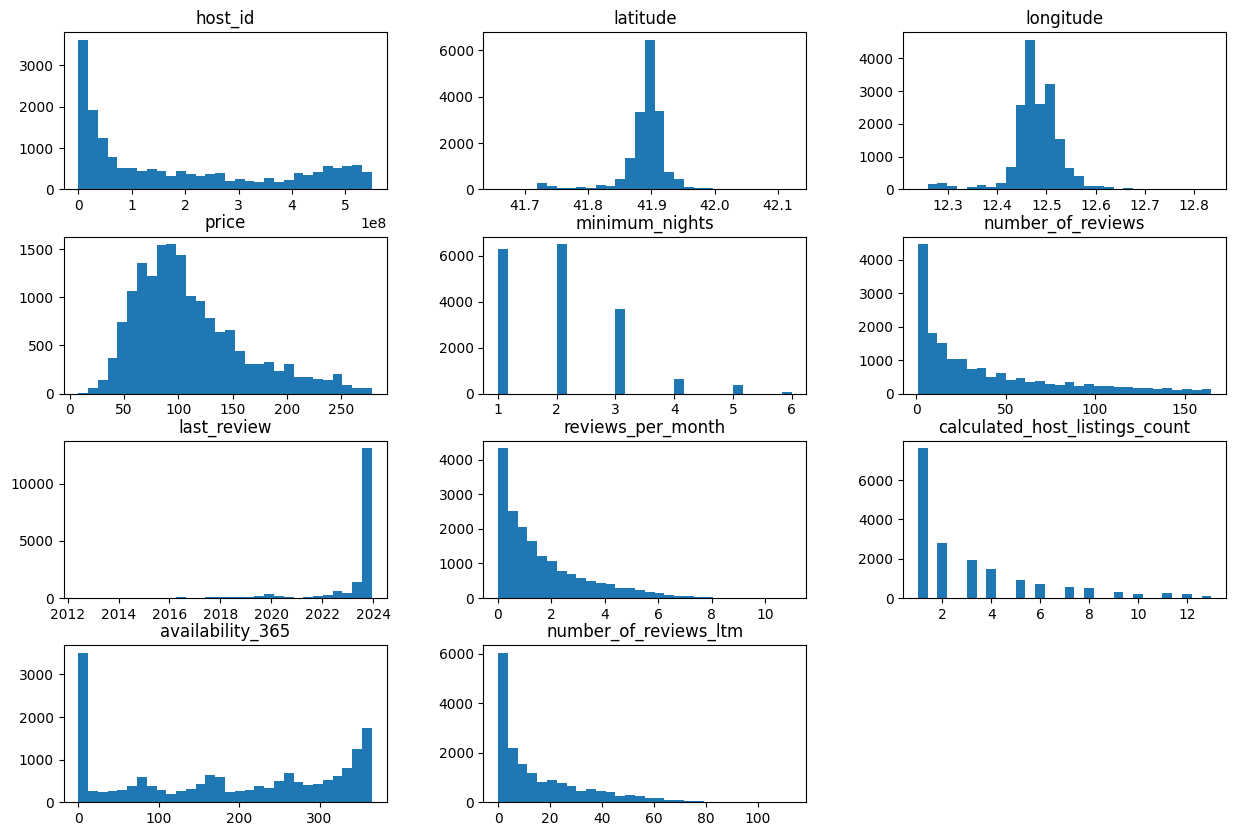

In [19]:
df_clean.hist(figsize = (15, 10), bins = 30, grid = False);

### **Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [20]:
# ver a média da coluna `minimum_nights``
minimum_nights_mean = df.minimum_nights.mean().astype('int')
print('Número médio de noites para uma locação no Airbnb:', minimum_nights_mean)

Número médio de noites para uma locação no Airbnb: 3


### **Qual a média e a moda dos preços de aluguel?**

In [21]:
# ver a média da coluna price
media_price = df['price'].mean().round(2)
print(f'Média dos aluguéis oferecidos pelo Airbnb em Roma: {media_price}')

# ver a moda da coluna price
mode_price = df['price'].mode()
print(f'Moda dos aluguéis oferecidos pelo Airbnb em Roma: {mode_price[0]}')

Média dos aluguéis oferecidos pelo Airbnb em Roma: 172.38
Moda dos aluguéis oferecidos pelo Airbnb em Roma: 100.0


Nota-se que a média é em torno de **70% maior** que moda dos preços. Este é um indício de que a média não representa muito bem a maioria dos indivíduos.

### **Qual a correlação existente entre as variáveis**

Decidiu-se gerar o gráfico de correlação entre variáveis a fim de analisar correlações diretas ou indiretas entre elas no dataframe.

O primeiro passo é gerar um novo dataframe contendo as correlações das colunas utilizando ferramentas embutidas do *pandas*. Em seguida gerou-se um *plot* do tipo *heatmap* para fins de visualização por ser muito intuitivo para este tipo de análise.

In [22]:
# criando uma matriz de correlação
corr_matrix = df.drop(['host_id', 'latitude', 'longitude'], axis = 1).corr()
corr_matrix

<ipython-input-22-dca52db66ea4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.drop(['host_id', 'latitude', 'longitude'], axis = 1).corr()


price  minimum_nights  number_of_reviews  \
price                           1.000000        0.054077          -0.035912   
minimum_nights                  0.054077        1.000000          -0.024034   
number_of_reviews              -0.035912       -0.024034           1.000000   
reviews_per_month              -0.062714       -0.054030           0.488052   
calculated_host_listings_count  0.008470       -0.021012          -0.026810   
availability_365                0.001004       -0.003143          -0.078806   
number_of_reviews_ltm          -0.055264       -0.051438           0.698671   

                                reviews_per_month  \
price                                   -0.062714   
minimum_nights                          -0.054030   
number_of_reviews                        0.488052   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.010817   
availability_365                        -0.056946   
number_of_reviews_ltm                    0.790811   

                                calculated_host_listings_count  \
price                                                 0.008470   
minimum_nights                                       -0.021012   
number_of_reviews                                    -0.026810   
reviews_per_month                                    -0.010817   
calculated_host_listings_count                        1.000000   
availability_365                                     -0.054154   
number_of_reviews_ltm                                -0.005250   

                                availability_365  number_of_reviews_ltm  
price                                   0.001004              -0.055264  
minimum_nights                         -0.003143              -0.051438  
number_of_reviews                      -0.078806               0.698671  
reviews_per_month                      -0.056946               0.790811  
calculated_host_listings_count         -0.054154              -0.005250  
availability_365                        1.000000              -0.058715  
number_of_reviews_ltm                  -0.058715               1.000000

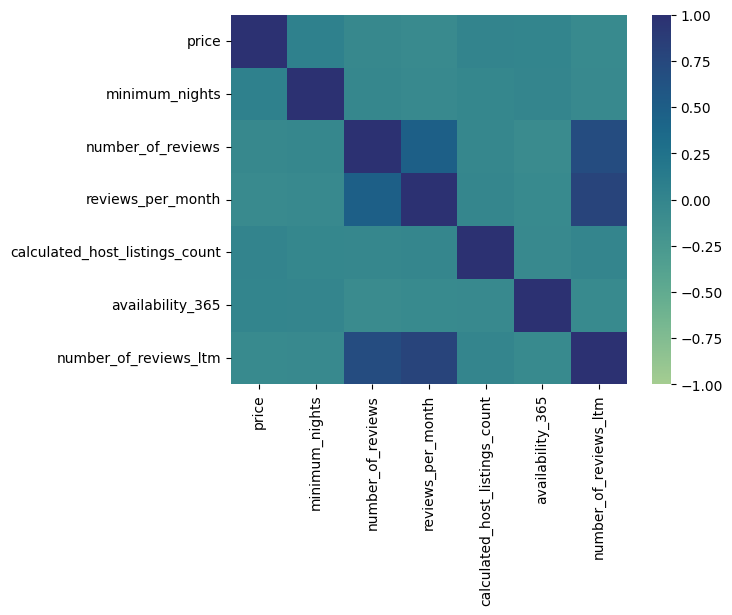

In [23]:
# plotaando um heatmap a partir das correlações
fig = sns.heatmap(data = corr_matrix, cmap="crest", robust=True, vmin = -1, vmax = 1)

Analisando o gráfico, percebe-se que não há fortes correlações entre as variáveis, a não ser daquelas que se referem a números de *reviews*. Porém, por este tipo de correlação não é útil *fins de business inteligence*, decidiu-se **não proceguir** com este tipo de estudo.

### **Qual o tipo de imóvel mais alugado no Airbnb?**

In [24]:
# mostrar a quantidade de cada tipo de imóvel disponível
room_types_distribuition = pd.DataFrame(df['room_type'].value_counts())
room_types_distribuition['Porcentagem (%)'] = ((room_types_distribuition['room_type'] / room_types_distribuition['room_type'].sum()) * 100).round(2)
room_types_distribuition


room_type  Porcentagem (%)
Entire home/apt      20743            70.66
Private room          7873            26.82
Hotel room             596             2.03
Shared room            145             0.49

Verifica-se que o tipo de imóvel mais alugado pelo Airbnb é do tipo "Toda Casa/Apartamento" (Entire home/apt), representando pouco mais de **70% de todo conjunto de dados**.

### **Qual a localidade mais cara do dataset?**



In [25]:
# Vendo preços por bairros, na média e os ordenando de forma descendente
neighbourhood_mean_price = pd.DataFrame(df_clean.groupby('neighbourhood')['price'].mean()).round(2).sort_values(by = 'price', ascending = False)

# Mostrando tabela
neighbourhood_mean_price

price
neighbourhood                     
I Centro Storico            124.54
XIII Aurelia                111.01
II Parioli/Nomentano        108.15
XII Monte Verde             102.32
XV Cassia/Flaminia           98.89
VIII Appia Antica            97.62
XIV Monte Mario              96.05
VII San Giovanni/Cinecittà   94.38
XI Arvalia/Portuense         91.58
IX Eur                       90.85
IV Tiburtina                 90.45
III Monte Sacro              89.11
X Ostia/Acilia               86.00
V Prenestino/Centocelle      77.08
VI Roma delle Torri          70.52

In [26]:
expensive_region = neighbourhood_mean_price.index[0]
mean_price_expensive_region = neighbourhood_mean_price['price'].iloc[0]

print(f"Distrito mais caro da região: {expensive_region}");
print(f'Média do preço mais caro: {mean_price_expensive_region}');

Distrito mais caro da região: I Centro Storico
Média do preço mais caro: 124.54


Para a analise de bairro mais caro utilizou-se o *dataframe* limpo de *outliers* por se tratar do conjunto de dados que mais representa o geral. De acordo com o site [hoteis.com](https://www.hoteis.com/go/italy/centro-storico-rome), isto é o que se fala do centro histórico de Roma:

"Centro Storico faz parte do sítio declarado Patrimônio Mundial em Roma, Itália, como um bairro histórico proeminente, rico em cultura antiga e pontos arquitetônicos. As três ruas, ou "tridente", que compõem a área comercial do Centro Storico começam na Piazza del Popolo e consistem na Via di Ripetta, Via del Corso e Via del Babuino, paralelas entre si. Essas ruas são adornadas por monumentos impressionantes, lojas de designers, boutiques modernas, bares animados e clubes de dança alegres, criando uma atmosfera divertida e aventureira com uma mistura diversificada de pessoas."

Não é de se espantar que este seja o bairro com maior média de preço. Nota-se que de fato é uma região com muitas atrações turísticas e portanto, com **maior procura**.

### **Mostrando a distribuição dos imóveis disponíveis no mapa de Roma**

In [27]:
import branca.colormap as cm

colormap = cm.LinearColormap(["green", "yellow", "red"], vmin=df['price'].min(), vmax=df['price'].max(), index = [df['price'].min(), 278, 278*2,])

In [28]:
map = folium.Map([df['latitude'].mean() ,df['longitude'].mean()],tiles="Cartodb Positron",
                        zoom_start=11,
                        width="%100",
                        height="%100")

df_coordenadas = df.dropna(axis = 0)

coordenadas = list(zip(df_coordenadas['latitude'],df_coordenadas['longitude']))

for i in range(len(coordenadas)):
  folium.CircleMarker(location=coordenadas[i],
                      radius=2,
                      tooltip= df_coordenadas['price'].iloc[i],
                      opacity=0.7,
                      color=colormap(df_coordenadas['price'].iloc[i])
                      ).add_to(map)


In [29]:
# importando biblioteca para visualização do mapa no Github
from IPython.core.display import display, HTML

data = map.get_root().render()
data_fixed_height = data.replace('width: 100%;height: 100%', 'width: 100%').replace('height: 100.0%;', 'height: 609px;', 1)
display(HTML(data_fixed_height))

## Conclusões


- Com as análises feitas durante este projeto destacou-se o fato de que a variável categórica `neighbourhood` possui muito mais influência no valor cobrado do que o restante das variáveis numéricas.
- Nota-se uma concentração de ofertas no litoral do território da cidade no bairro Lido di Ostia. É interessante notar que este bairro não está na lista dos bairros mais caros de Roma apesar de se situar no litoral.
- Para projetos futuros, faz-se necessário trabalhar com um *dataset* mais completo, pois nota-se que o gráfico de correlação das variáveis numéricas não apresentou conexão entre suas próprias variáveis.